In [1]:
import pandas as pd

acctDF = pd.read_parquet("data/q2-ucsd-acctDF.pqt")
cat_map = pd.read_csv('data/q2-ucsd-cat-map.csv')
consDF = pd.read_parquet('data/q2-ucsd-consDF.pqt')
trxnDF = pd.read_parquet('data/q2-ucsd-trxnDF.pqt')



In [4]:
acctDF.account_type.value_counts()

account_type
CHECKING           15467
SAVINGS             7751
CREDIT CARD          691
LOAN                 127
LINE OF CREDIT        93
CONSUMER              73
BROKERAGE             66
CD                    45
MONEY MARKET          36
AUTO                  29
MORTGAGE              22
PREPAID               19
OTHER                 12
IRA                    9
ROTH                   5
CASH MANAGEMENT        5
401K                   4
RETIREMENT             3
STUDENT                2
HSA                    2
OVERDRAFT              2
MONEYMARKET            1
STOCK PLAN             1
HOME EQUITY            1
Name: count, dtype: int64

In [2]:
test = trxnDF.copy()
neg_test = test[test['amount'] < 0]
print(test[(test['prism_consumer_id'] == '10533') & (test['category'] == 8)].head(87))
print(test[(test['prism_consumer_id'] == '10533')].amount.sum())
print(consDF[consDF['prism_consumer_id'] == '10533'])
cat_map

        prism_consumer_id prism_transaction_id  category  amount  \
6407234             10533              6405222         8  -841.0   
6407236             10533              6405224         8 -1682.0   
6407240             10533              6405228         8  -841.0   
6407241             10533              6405229         8  -841.0   
6407244             10533              6405232         8  -841.0   
6407245             10533              6405233         8  -841.0   

        credit_or_debit posted_date  
6407234          CREDIT  2022-01-30  
6407236          CREDIT  2022-01-31  
6407240          CREDIT  2022-02-27  
6407241          CREDIT  2022-02-27  
6407244          CREDIT  2022-03-30  
6407245          CREDIT  2022-03-30  
-1373.2299999999998
      prism_consumer_id evaluation_date  credit_score  DQ_TARGET
10533             10533      2022-03-31         789.0        1.0


,category_id,category
0,0,SELF_TRANSFER
1,1,EXTERNAL_TRANSFER
2,2,DEPOSIT
3,3,PAYCHECK
4,4,MISCELLANEOUS
5,5,PAYCHECK_PLACEHOLDER
6,6,REFUND
7,7,INVESTMENT_INCOME
8,8,OTHER_BENEFITS
9,9,UNEMPLOYMENT_BENEFITS


In [55]:
def calculate_percent(df):
    df['percent_debit'] = df.total_debit/df.total
trxn = trxnDF.loc[:1000]
cat = cat_map.copy()
trxn['credit_or_debit'] = trxn['credit_or_debit'].apply(helper)
trxn = trxn.groupby('category').agg(total_debit = ('credit_or_debit', 'sum'), total = ('credit_or_debit', 'count'))
cat = cat.join(trxn, on='category_id', how='left') 
calculate_percent(cat)
debit_only = cat[cat['percent_debit'] == 1]
credit_only = cat[cat['percent_debit'] == 0]
mixed = cat[(cat['percent_debit'] != 1) & (cat['percent_debit'] != 0)]

/tmp/ipykernel_504/350538608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trxn['credit_or_debit'] = trxn['credit_or_debit'].apply(helper)


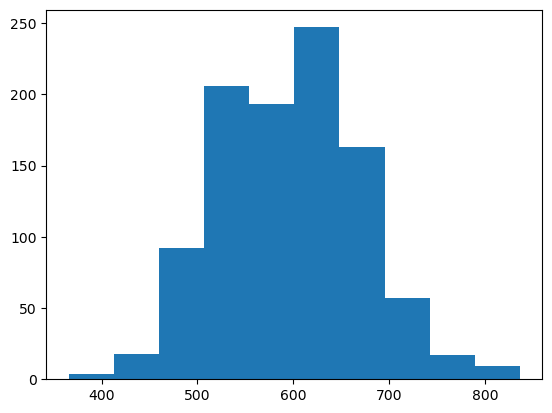

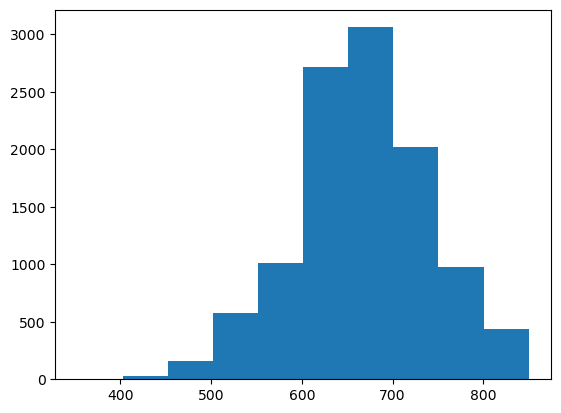

In [69]:
import matplotlib.pyplot as plt
import numpy as np 
deliquent = consDF[consDF['DQ_TARGET'] == 1]
non_deliquent = consDF[consDF['DQ_TARGET'] == 0]
plt.hist(deliquent['credit_score'])
plt.show()
plt.hist(non_deliquent['credit_score'])
plt.show()

In [157]:
prev_min = int(consDF['credit_score'].min())
percent_deliquent={}
for i in range(int(consDF['credit_score'].min()) + 25, int(consDF['credit_score'].max()), 25):
    our_range = consDF[(consDF['credit_score'] > prev_min) & (consDF['credit_score'] < i)]
    if our_range.shape[0] == 0:
        percent_deliquent[f"{prev_min} to {i}"] = np.NAN
        prev_min = i
    else:
        percent_deliquent[i] = our_range[our_range['DQ_TARGET'] == 1].shape[0] / our_range.shape[0]
        prev_min = i

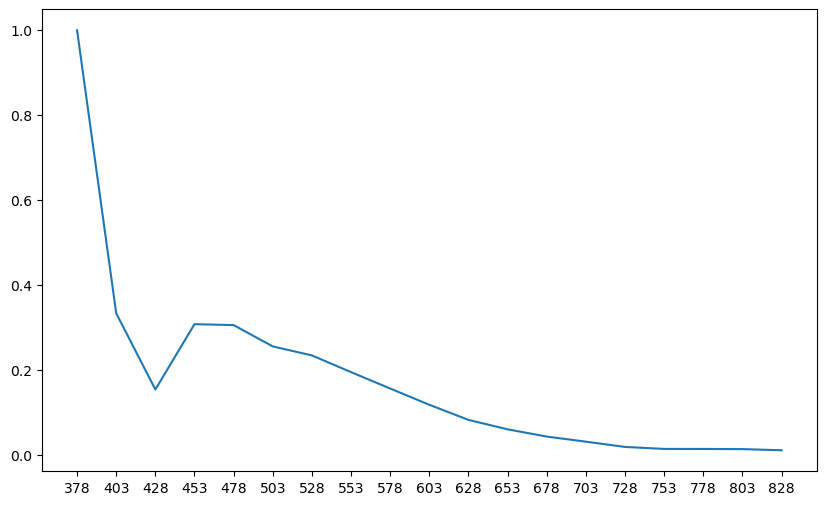

In [171]:
plt.figure(figsize = (10,6))
plt.plot(list(percent_deliquent.keys()), list(percent_deliquent.values()))
plt.xticks(list(percent_deliquent.keys()))
plt.show()

In [140]:
list(percent_deliquent.values())

[0.42857142857142855,
 0.2641509433962264,
 0.271523178807947,
 0.21021611001964635,
 0.1366954213669542,
 0.0693254817987152,
 0.037471322967117,
 0.016200891049007696,
 0.01343408900083963]

In [173]:
consDF
trxnDF

,prism_consumer_id,prism_transaction_id,category,amount,credit_or_debit,posted_date
0,3023,0,4,0.05,CREDIT,2021-04-16
1,3023,1,12,481.56,CREDIT,2021-04-30
2,3023,2,4,0.05,CREDIT,2021-05-16
3,3023,3,4,0.07,CREDIT,2021-06-16
4,3023,4,4,0.06,CREDIT,2021-07-16
...,...,...,...,...,...,...
6407316,10533,6405304,31,4.96,DEBIT,2022-03-11
6407317,10533,6405305,12,63.48,DEBIT,2022-03-30
6407318,10533,6405306,12,53.99,DEBIT,2022-03-30
6407319,10533,6405307,12,175.98,DEBIT,2022-03-31


,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET
0,0,2021-09-01,726.0,0.0
1,1,2021-07-01,626.0,0.0
2,2,2021-05-01,680.0,0.0
3,3,2021-03-01,734.0,0.0
4,4,2021-10-01,676.0,0.0
...,...,...,...,...
14995,14995,2022-03-08,655.0,NaN
14996,14996,2022-01-15,625.0,NaN
14997,14997,2022-01-31,688.0,NaN
14998,14998,2022-03-08,722.0,NaN


In [180]:
credit_only

,category_id,category,total_debit,total,percent_debit
2,2,DEPOSIT,0.0,22.0,0.0
3,3,PAYCHECK,0.0,33.0,0.0
6,6,REFUND,0.0,5.0,0.0
11,11,TAX,0.0,5.0,0.0
49,49,PENSION,0.0,6.0,0.0
